# Загрузка Pandas и очистка данных

учетная запись kaggle  ygpalvanovagmailru 
https://www.kaggle.com/ygpalvanovagmailru/bad-trip-advisor

In [1186]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from itertools import combinations
from scipy.stats import ttest_ind
import statsmodels.api as sm
import scipy.stats as sst
from collections import Counter
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

import os

filenames_list = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        filenames_list.append(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler


In [1187]:
import warnings
from dateutil import parser
import dateutil
from datetime import datetime, timedelta
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
import numpy as np
import pandas as pd
from statistics import variance
# импорт дробей как значений параметров
from fractions import Fraction as fr
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import datetime
type(datetime)
print(type(datetime))
from datetime import datetime
#and the access its now method simpler
d1 = datetime.now()
!pip install missingno
import missingno as msno

<class 'module'>


In [1188]:
# Фиксация RANDOM_SEED, чтобы эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [1189]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

Загрузим датасеты. Добавим дополнительный датасет по городам. Далее попробуем достать из него полезные нам признаки.

In [1190]:
#path_to_file = '/kaggle/input/sf-dst-restaurant-rating/'
#city = 'https://www.kaggle.com/orhankaramancode/city-quality-of-life-dataset?select=uaScoresDataFrame.csv'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')
pd.set_option('display.max_columns', 200)
cost =  pd.read_excel('Cost_of_living_index.xlsx')
df_city = pd.read_csv('worldcities.csv')
negative = pd.read_excel('negative-words.xls', header = None)
#список описательных слов с отрицательной эмоциональной окраской
positive = pd.read_excel('positive-words.xls', header = None) 
#список описательных слов с положительной эмоциональной окраской
display(df_train.head(2))
display(df_test.head(2))
display(sample_submission.head(2))
display(cost.head(2))
display(df_city.head(2))


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944


,id,cuisine
0,35203,italian
1,17600,italian


,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Hamilton,Bermuda,137.56,103.03,121.21,126.56,151.77,114.19
1,2,Zurich,Switzerland,128.65,62.62,97.39,127.35,127.14,142.39


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077


In [1191]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [1301]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1


In [1302]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
 9   sample             10000 non-null  int64  
 10  Rating             10000 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [1303]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0


In [1304]:
sample_submission.head(5)

,id,cuisine
0,35203,italian
1,17600,italian
2,35200,italian
3,17602,italian
4,17605,italian


In [1305]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9944 non-null   int64 
 1   cuisine  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


In [1306]:
# дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем, где у нас трейн
df_test['sample'] = 0 # помечаем, где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, поэтому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [1307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


# Methods


### Расшифровка наименования колонок

- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine_Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price_Range — диапазон цен в ресторане;
- Number_of_Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvosor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [1308]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
12957,id_1948,Lyon,NaN,1949.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187265-d7251714-Reviews-Es...,d7251714,1,4.0
16397,id_886,Zurich,['Turkish'],890.0,$,13.0,"[['Pity they were forced to move.......', 'Gre...",/Restaurant_Review-g188113-d7356776-Reviews-Eg...,d7356776,1,4.5
1668,id_1668,Budapest,"['European', 'Soups', 'Eastern European', 'Cen...",181.0,$$ - $$$,1402.0,"[['Delicious late breakfast!', 'Must try'], ['...",/Restaurant_Review-g274887-d1790459-Reviews-Fi...,d1790459,0,0.0
45103,id_7105,Madrid,NaN,7109.0,NaN,5.0,"[['Lovely', 'Ok for a beer'], ['09/25/2017', '...",/Restaurant_Review-g187514-d10693822-Reviews-L...,d10693822,1,3.0
35978,id_2739,Amsterdam,NaN,2746.0,NaN,NaN,"[[], []]",/Restaurant_Review-g188590-d11637313-Reviews-M...,d11637313,1,4.0



## Очистка и обработка данных
### Обработка признаков
Пройдемся по каждому признаку и приведем предварительную обработку. Посмотрим на дубли, пропуски и создадим новые признаки.


In [1309]:
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

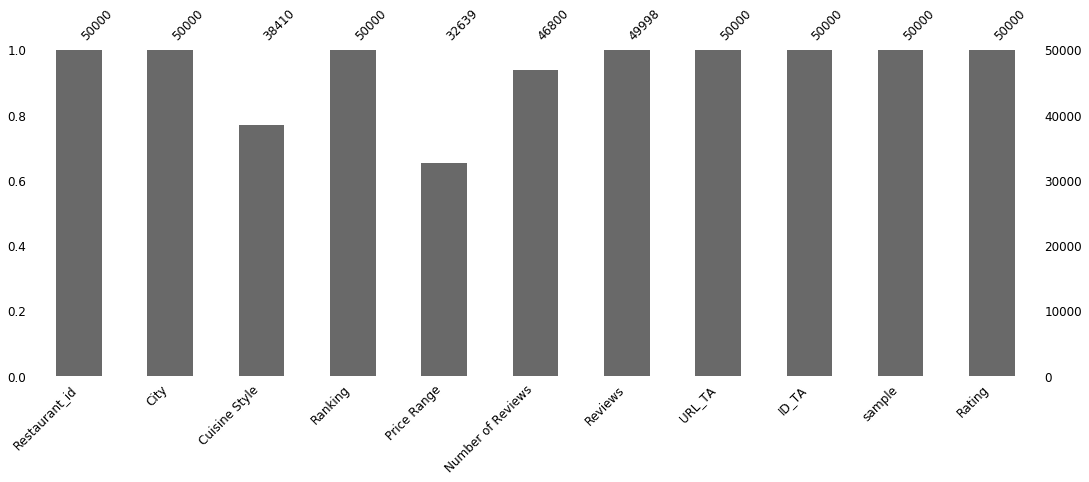

In [1310]:
msno.bar(data, figsize=(18, 6),  fontsize=12)

Cuisine Style, Price Range и Number of Reviews содержат пропуски. Их удаление может негативно сказаться на результате исследований, поэтому, лучше их заполнить и создадать новые признаки, которые будут говорить об отсутствии информации.

Для начала посмотрим какие признаки у нас могут быть категориальными.

In [1202]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Все признаки содержащие строковые данные являются котегориаьлными. Для дальнейшего анализа лучше оцифровать(закодировать) котегориальные признаки. Для кодирования подходят следующие признаки: City,Cuisine Style, Price Range - ординальный признак.
Создадим признак количества ресторанов в городе

#### City

Попробуем обработать города.

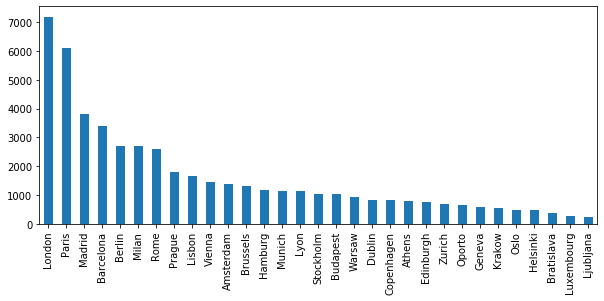

In [1203]:
plt.figure(figsize=(10,4))
data.City.value_counts(ascending=False).plot(kind='bar');

In [1204]:
city_counts_dict = dict(data['City'].value_counts())
city_counts_dict

{'London': 7193,
 'Paris': 6108,
 'Madrid': 3813,
 'Barcelona': 3395,
 'Berlin': 2705,
 'Milan': 2694,
 'Rome': 2589,
 'Prague': 1816,
 'Lisbon': 1647,
 'Vienna': 1443,
 'Amsterdam': 1372,
 'Brussels': 1314,
 'Hamburg': 1186,
 'Munich': 1145,
 'Lyon': 1126,
 'Stockholm': 1033,
 'Budapest': 1021,
 'Warsaw': 925,
 'Dublin': 836,
 'Copenhagen': 819,
 'Athens': 776,
 'Edinburgh': 745,
 'Zurich': 685,
 'Oporto': 642,
 'Geneva': 590,
 'Krakow': 554,
 'Oslo': 488,
 'Helsinki': 475,
 'Bratislava': 380,
 'Luxembourg': 263,
 'Ljubljana': 222}

In [1205]:
# Посчитаем количество рестаранов в каждом горолде.
data['rest_counts'] = data.City.map(city_counts_dict)
data['rest_counts']

0        6108
1         475
2         745
3        7193
4         380
         ... 
49995    2694
49996    6108
49997    1033
49998     925
49999    2694
Name: rest_counts, Length: 50000, dtype: int64

Создадим список городов и найдем в добавленом датасете эти города.

In [1206]:
# В списке городов есть город Oporto, скорее всего, это ошибка, а речь идет о гоороде Porto. Исправим это. 
data.loc[data.City == 'Oporto', 'City'] = 'Porto' 
city_lst = data.City.unique()
city_lst

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw', 'Porto',
       'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

Дополним наш data признаком ранг города. Он нам в дальнейшем может пригодиться

In [1207]:
data['ranked_cities'] = data['City'].rank()

Поработаем над ДатаСетом со списком городов. Оставим в нем только города, которые нам необходимы для работы.

In [1208]:
df_city = df_city[(df_city.city_ascii.isin(city_lst)) &
                  (df_city.country != 'United States') &
                  (df_city.country != 'Canada') &
                  (df_city.country != 'Venezuela')]
df_city.head(3)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
33,Paris,Paris,48.8566,2.3522,France,FR,FRA,Île-de-France,primary,11020000.0,1250015082
34,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,10979000.0,1826645935
163,Barcelona,Barcelona,41.3825,2.1769,Spain,ES,ESP,Catalonia,admin,4588000.0,1724594040


In [1209]:
set(city_lst) - set(df_city.city_ascii) # проверяем все ли города нашли

set()

Удалим ненужные колонки, заменим пропуски и переведем численость в млн. человек. Признак столица заменим числовыми значениями на 0 и 1

In [1210]:
df_city = df_city.drop(['city_ascii', 'iso2', 'iso3', 'admin_name',  'id'], axis=1)
df_city['population']  = round((df_city['population'] / 1000000), 2)
df_city.capital.fillna('primary', inplace=True)
df_city['capital'] = df_city.capital.apply(lambda x: 1 if x == 'primary' else 0)
country_lst = df_city['country'].tolist()
cost.head(3)

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Hamilton,Bermuda,137.56,103.03,121.21,126.56,151.77,114.19
1,2,Zurich,Switzerland,128.65,62.62,97.39,127.35,127.14,142.39
2,3,Basel,Switzerland,126.89,46.14,88.66,120.44,129.1,141.48


In [1211]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 33 to 2585
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        31 non-null     object 
 1   lat         31 non-null     float64
 2   lng         31 non-null     float64
 3   country     31 non-null     object 
 4   capital     31 non-null     int64  
 5   population  31 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.7+ KB


In [1212]:
data.head(3)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,475,15377.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,745,12991.0


In [1213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
 11  rest_counts        50000 non-null  int64  
 12  ranked_cities      50000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.0+ MB


Теперь поработаем еще над одним вспомогательным файлом - стоимость жизни. В первую очередь, поправим наименование страны Czec - такой страны нет. Скорее всего, это Czechia. Поправим.

In [1214]:
cost.loc[cost.Country.str.contains('Czec'), 'Country'] = 'Czechia'
cost = cost[cost.Country.isin(country_lst)]

In [1215]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 340 to 389
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            4 non-null      int64 
 1   City                            4 non-null      object
 2   Country                         4 non-null      object
 3   Cost of Living Index            4 non-null      object
 4   Rent Index                      4 non-null      object
 5   Cost of Living Plus Rent Index  4 non-null      object
 6   Groceries Index                 4 non-null      object
 7   Restaurant Price Index          4 non-null      object
 8   Local Purchasing Power Index    4 non-null      object
dtypes: int64(1), object(8)
memory usage: 320.0+ bytes


In [1216]:
set(country_lst) - set(cost.Country)

{'Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom'}

In [1217]:
cost.columns

Index(['Rank', 'City', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

Удалим лишние столбцы, которые нам не пригодятся для работы

In [1218]:
cost.drop(['Rent Index', 'Cost of Living Plus Rent Index',
           'Groceries Index', 'Local Purchasing Power Index' ], axis=1, inplace=True)

Объединим все наши датасеты в один. 

In [1311]:
cost.rename(columns={'Country':'country','City':'city'}, inplace=True)
data.rename(columns={'City':'city'}, inplace=True)

In [1220]:
data = pd.merge(data, df_city, on='city', how='inner')
data

,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02
1,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02
2,id_15,Paris,['French'],12899.0,$,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02
3,id_31,Paris,NaN,3156.0,NaN,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02
4,id_34,Paris,['French'],476.0,$$ - $$$,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48756,id_190,Ljubljana,"['Irish', 'Bar', 'Pub', 'British']",191.0,$,60.0,"[['Nice place', 'Quiz'], ['03/31/2017', '01/25...",/Restaurant_Review-g274873-d948475-Reviews-Pat...,d948475,1,4.0,222,17926.5,46.0500,14.5167,Slovenia,1,0.28
48757,id_347,Ljubljana,NaN,348.0,NaN,10.0,"[['By the river', 'Unique experience!'], ['08/...",/Restaurant_Review-g274873-d11924327-Reviews-K...,d11924327,1,4.0,222,17926.5,46.0500,14.5167,Slovenia,1,0.28
48758,id_429,Ljubljana,NaN,430.0,NaN,9.0,"[[""It's always nice to be here."", 'Food is goo...",/Restaurant_Review-g274873-d7997510-Reviews-Je...,d7997510,1,3.5,222,17926.5,46.0500,14.5167,Slovenia,1,0.28
48759,id_338,Ljubljana,['Mediterranean'],339.0,$,9.0,"[['Good and fast food', 'The best kebab in tow...",/Restaurant_Review-g274873-d8670188-Reviews-Ag...,d8670188,1,4.0,222,17926.5,46.0500,14.5167,Slovenia,1,0.28


In [1221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48761 entries, 0 to 48760
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      48761 non-null  object 
 1   city               48761 non-null  object 
 2   Cuisine Style      37446 non-null  object 
 3   Ranking            48761 non-null  float64
 4   Price Range        31790 non-null  object 
 5   Number of Reviews  45637 non-null  float64
 6   Reviews            48759 non-null  object 
 7   URL_TA             48761 non-null  object 
 8   ID_TA              48761 non-null  object 
 9   sample             48761 non-null  int64  
 10  Rating             48761 non-null  float64
 11  rest_counts        48761 non-null  int64  
 12  ranked_cities      48761 non-null  float64
 13  lat                48761 non-null  float64
 14  lng                48761 non-null  float64
 15  country            48761 non-null  object 
 16  capital            487

Создадим признак количество ресторанов в городе.

In [1222]:
city_counts_dict = dict(data['city'].value_counts())

In [1223]:
data['rest_counts'] = data.city.map(city_counts_dict)

In [1224]:
data.head(3)

,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02
1,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02
2,id_15,Paris,['French'],12899.0,$,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02


In [1225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48761 entries, 0 to 48760
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      48761 non-null  object 
 1   city               48761 non-null  object 
 2   Cuisine Style      37446 non-null  object 
 3   Ranking            48761 non-null  float64
 4   Price Range        31790 non-null  object 
 5   Number of Reviews  45637 non-null  float64
 6   Reviews            48759 non-null  object 
 7   URL_TA             48761 non-null  object 
 8   ID_TA              48761 non-null  object 
 9   sample             48761 non-null  int64  
 10  Rating             48761 non-null  float64
 11  rest_counts        48761 non-null  int64  
 12  ranked_cities      48761 non-null  float64
 13  lat                48761 non-null  float64
 14  lng                48761 non-null  float64
 15  country            48761 non-null  object 
 16  capital            487

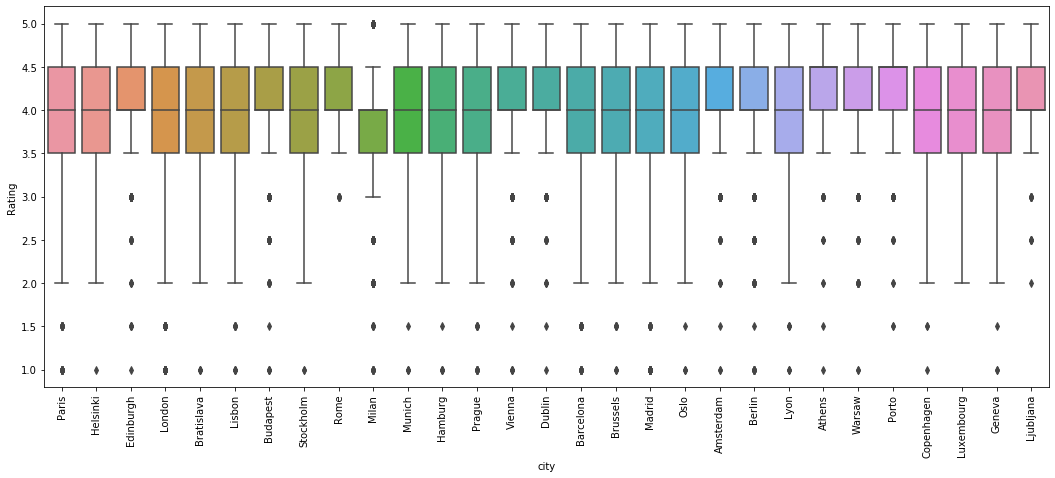

In [1226]:
plt.figure(figsize=(18, 7))
sns.boxplot(x='city', y='Rating', data=data[data['sample'] == 1])
plt.xticks(rotation=90);

На графике можно увидеть, что рейтинг ресторанов в Rome начинаются с 3, а в Milan вероятность рейтинга с оценкой 5 очень мала.

#### Cuisine Style


In [1227]:
data['Cuisine Style'][1]

"['French', 'Cafe', 'Fast Food']"

Создадим список уникальных кухонь представленных во всем датасете. Пропуски заполним значением 'Other', создадим колонку, которая показывает было ли значение пустое.

In [1228]:
data['Cuisine Style_NAN'] = data['Cuisine Style'].isna().astype('uint8')

In [1229]:
data['Cuisine Style'].fillna("['Other']", inplace=True)

In [1230]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x))

Создадим признак 'count_cuis' - количество представленных кухонь в ресторане.

In [1231]:
data['count_cuis'] = data['Cuisine Style'].apply(lambda x: len(x))

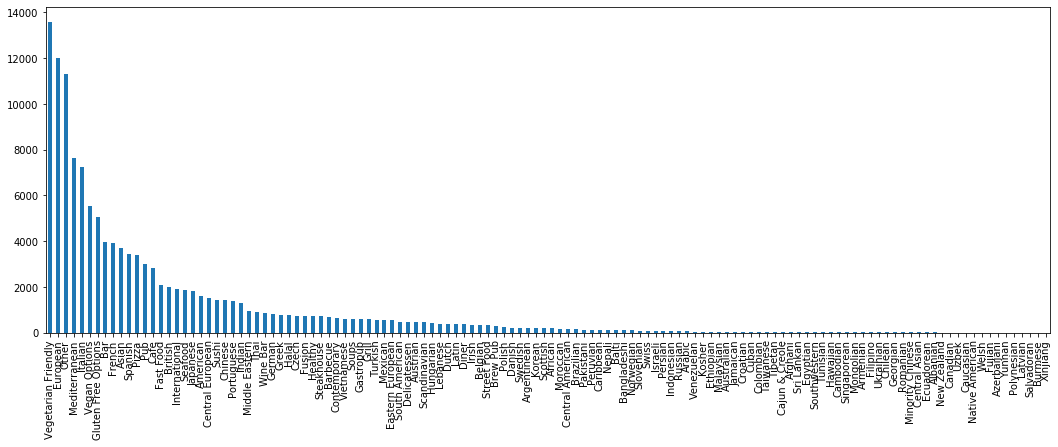

In [1232]:
plt.figure(figsize=(18,6))
data.explode('Cuisine Style')['Cuisine Style'].value_counts(ascending=False).plot(kind='bar');

vegetarian friendly и european - самые популярные кухни в ресторанах. Установим критерий популяности кухни. Кухни, встречающиеся реже 100 раз, будем считать редкими.

In [1233]:
cuisine_r_lst = data.explode('Cuisine Style')['Cuisine Style'].value_counts()[
    data.explode('Cuisine Style')['Cuisine Style'].value_counts() < 100].index.tolist()


In [1234]:
def cuisine_r_count(cell):
#Количество редких кухонь в ресторане'''
    x = 0
    for i in cuisine_r_lst:
        if i in cell:
            x += 1
    return x


In [1235]:
data['cuisine_r'] = data['Cuisine Style'].apply(cuisine_r_count)

dummy переменные кухонь

In [1236]:
cuisine_lst = list(data.explode('Cuisine Style')['Cuisine Style'].unique())

In [1237]:
def find_item(cell):
    if item in cell:
        return 1
    return 0
    
for item in cuisine_lst:
    data[item] = data['Cuisine Style'].apply(find_item)


In [1238]:
data.head(5)

,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_5,Paris,"[French, Cafe, Fast Food]",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_15,Paris,[French],12899.0,$,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_31,Paris,[Other],3156.0,NaN,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_34,Paris,[French],476.0,$$ - $$$,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1239]:
data.sample(5)

,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran
27139,id_1404,Prague,"[Sushi, Asian, Vietnamese]",1406.0,$$ - $$$,7.0,"[['favorite Asian restaurant in Prague', 'Grea...",/Restaurant_Review-g274707-d10113620-Reviews-R...,d10113620,1,5.0,1816,42417.5,50.0833,14.4167,Czechia,1,1.32,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13994,id_3993,London,"[Healthy, Cafe, British, Vegetarian Friendly, ...",4000.0,$$ - $$$,100.0,"[['Super healthy super tasteless', 'Fab dinner...",/Restaurant_Review-g186338-d10182312-Reviews-H...,d10182312,1,4.0,7193,21634.0,51.5072,-0.1275,United Kingdom,1,10.98,0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45385,id_4438,Warsaw,[Other],1549.0,NaN,5.0,"[['Nice coffee break.'], ['04/17/2017']]",/Restaurant_Review-g274856-d10243055-Reviews-G...,d10243055,0,0.0,925,48853.0,52.2167,21.0333,Poland,1,1.79,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13718,id_11827,London,[British],11837.0,NaN,8.0,"[['Warm, good vibe pub', 'Fantastic Pub Atmosp...",/Restaurant_Review-g186338-d2400243-Reviews-Th...,d2400243,1,4.5,7193,21634.0,51.5072,-0.1275,United Kingdom,1,10.98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9167,id_5049,London,"[European, Spanish, International, Mediterranean]",5058.0,$$ - $$$,83.0,"[['Very good sauteed kales (plural?), good se....",/Restaurant_Review-g186338-d2692590-Reviews-Tr...,d2692590,1,4.0,7193,21634.0,51.5072,-0.1275,United Kingdom,1,10.98,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Restaurant_id

Посмотрим на идентификаторы ресторанов

In [1240]:
data.Restaurant_id.value_counts()

id_344      18
id_227      18
id_436      18
id_871      17
id_245      17
            ..
id_7959      1
id_13702     1
id_14726     1
id_7340      1
id_12975     1
Name: Restaurant_id, Length: 13072, dtype: int64

Некоторые ID дублируются. Это может означать, ошибку, но скорее всего, это сетевые рестораны. Принимаем за истину второе утверждение. Для этого, создадим новый признак chain_rest: 1 - сетевой, 0 - несетевой

In [1241]:
chain_lst = list(data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index)

In [1242]:

data['chain_rest'] = data[data.Restaurant_id.isin(chain_lst)].Restaurant_id.apply(lambda x: 1)
data['chain_rest'].fillna(0, inplace=True)


In [1243]:
data['chain_rest'].value_counts()

1.0    44920
0.0     3841
Name: chain_rest, dtype: int64

#### ID_TA
Рассмотрим еще одну колонку, в которой есть уникальные id рестаранов.

In [1244]:
data['ID_TA'].value_counts()

d793170      2
d11698990    2
d10440367    2
d5618007     2
d1235635     2
            ..
d10214378    1
d11899228    1
d3422669     1
d4835406     1
d7208278     1
Name: ID_TA, Length: 48724, dtype: int64

In [1245]:
# Здесь тоже есть повторения, проверим как они сопостовляются со ссылками на рестораны.
data['URL_TA'].value_counts()


/Restaurant_Review-g187514-d3748757-Reviews-D_O_C_C_Prado-Madrid.html                                         2
/Restaurant_Review-g187514-d1315077-Reviews-El_Pimiento_Verde-Madrid.html                                     2
/Restaurant_Review-g187514-d1568045-Reviews-Restaurante_Lateral_Santa_Ana-Madrid.html                         2
/Restaurant_Review-g187514-d987900-Reviews-Compostela_Restaurante-Madrid.html                                 2
/Restaurant_Review-g187514-d1028622-Reviews-La_Terraza_del_Urban-Madrid.html                                  2
                                                                                                             ..
/Restaurant_Review-g186338-d5122080-Reviews-Gusto_And_Relish-London_England.html                              1
/Restaurant_Review-g188590-d10482257-Reviews-De_Keuken_van_Tante_Til-Amsterdam_North_Holland_Province.html    1
/Restaurant_Review-g187497-d13073178-Reviews-El_Moli_Pan_y_Cafe-Barcelona_Catalonia.html                

In [1246]:
# Из таблицы видно, что мы имеем дело с дубликатами ресторанов. Причем значение Ranking у них не одинаковые.
data[(data['URL_TA'].map(data['URL_TA'].value_counts()) == 2)].sort_values(by='ID_TA')


,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran,chain_rest
38764,id_3242,Madrid,[Other],3244.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,1,5.0,3813,28526.0,40.4189,-3.6919,Spain,1,3.27,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
36825,id_3239,Madrid,[Other],3241.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799,1,5.0,3813,28526.0,40.4189,-3.6919,Spain,1,3.27,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
35338,id_4534,Madrid,"[Bar, European, Spanish, Delicatessen]",1253.0,$$$$,116.0,"[['Visited the rooftop bar', 'SIXTH FLOOR ROOF...",/Restaurant_Review-g187514-d1028622-Reviews-La...,d1028622,0,0.0,3813,28526.0,40.4189,-3.6919,Spain,1,3.27,0,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
37164,id_1229,Madrid,"[Bar, European, Spanish, Delicatessen]",1231.0,$$$$,116.0,"[['Visited the rooftop bar', 'SIXTH FLOOR ROOF...",/Restaurant_Review-g187514-d1028622-Reviews-La...,d1028622,1,4.0,3813,28526.0,40.4189,-3.6919,Spain,1,3.27,0,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
46000,id_1800,Warsaw,[Italian],1801.0,$,3.0,"[[], []]",/Restaurant_Review-g274856-d10316215-Reviews-B...,d10316215,1,3.5,925,48853.0,52.2167,21.0333,Poland,1,1.79,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [1247]:
# В признаке URL_TA содержиться информация о названии ресторана, о ID_TA ресторана, а так же ID города. Попробуем поменять значение признака.
data['City_url_ta'] = data.URL_TA.str.findall(r"g([\s\S]+?)-").str[0]
data.head(5)

,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran,chain_rest,City_url_ta
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147
1,id_5,Paris,"[French, Cafe, Fast Food]",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147
2,id_15,Paris,[French],12899.0,$,39.0,"[['Very nice food and staff', 'Lovely service ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147
3,id_31,Paris,[Other],3156.0,NaN,19.0,"[['Very good food'], ['09/24/2017']]",/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147
4,id_34,Paris,[French],476.0,$$ - $$$,136.0,"[['Worthy of a trip out of the city centre!', ...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147


#### Reviews
Составим список с позитивными и негативными словами

In [1248]:
data.Reviews[1]

"[['Lunch Break', 'Good to Quick Bite'], ['09/07/2017', '09/02/2017']]"

Значения признака представлены в виде строки с определенной структурой.

In [1249]:
data['Reviews'] = data.Reviews.dropna().apply(
    lambda x: eval(x.replace('nan', '').replace('[,', "['',")))

In [1250]:
data['Reviews'] = data['Reviews'].dropna().apply(
    lambda x: np.nan if len(x[0]) == 0 & len(x[1]) == 0 else x)

Создадим новые признаки, reviews и reviews_text и reviews_date

In [1251]:
data['date'] = data['Reviews'].dropna().apply(lambda x: x[1])
data['date_f'] = data['date'].dropna().apply(lambda x: x[1] if len(x) == 2 else np.nan)
data['date_l'] = data['date'].dropna().apply(lambda x: x[0] if len(x) > 0 else np.nan)

In [1252]:
data.drop('date', axis=1, inplace=True)

Заменим пропуски в date_f и date_l на min и max дату соответственно. Чем больше разница, тем меньше отзывов получает ресторан.

In [1253]:
data['date_f'] = pd.to_datetime(data['date_f'])
data['date_l'] = pd.to_datetime(data['date_l'])

In [1254]:
data['date_f'].fillna(data['date_f'].min(), inplace=True)
data['date_l'].fillna(data['date_l'].max(), inplace=True)

Создадим признак разницы дней между последними двумя отзывами.

In [1255]:
data['rewiew_days'] = abs(data['date_l'] - data['date_f']).dt.days

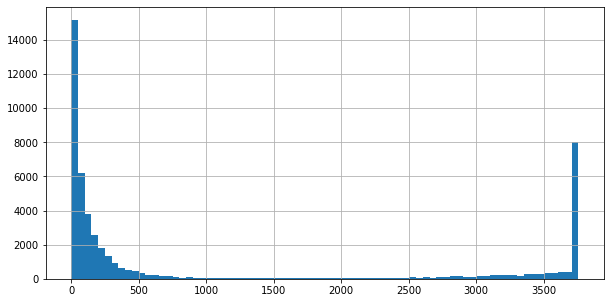

In [1256]:
plt.figure(figsize=(10,5))
data['rewiew_days'].hist(bins=75);

In [1257]:
data['days_to_today'] = (datetime.now() - data['date_l']).dt.days
data['days_to_today']

0        1060
1        1232
2        1481
3        1215
4        1219
         ... 
48756    1392
48757    1252
48758    1445
48759    1131
48760    1245
Name: days_to_today, Length: 48761, dtype: int64

Обработаем отзывы. Создадим признак количества последних комментариев (0-2)

In [1258]:
data['Reviews'] = data['Reviews'].dropna().apply(lambda x: x[0])

In [1259]:
data['last_rewiew_counts'] = data['Reviews'].dropna().apply(
    lambda x: 2 if len(x) == 2 else 1 if len(x) == 1 else 0)

In [1260]:
data.last_rewiew_counts.fillna(0, inplace=True)

In [1261]:
def len_rewiews(cell):
    x = 0
    for i in cell:
        x += len(i)
    return x

In [1262]:
data['len_rewiews'] = data['Reviews'].dropna().apply(len_rewiews)
data['len_rewiews'].fillna(0, inplace=True)

In [1263]:
data.head()



,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran,chain_rest,City_url_ta,date_f,date_l,rewiew_days,days_to_today,last_rewiew_counts,len_rewiews
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2007-11-14,2018-02-26,3757,1060,0.0,0.0
1,id_5,Paris,"[French, Cafe, Fast Food]",5093.0,$,24.0,"[Lunch Break, Good to Quick Bite]",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2017-09-02,2017-09-07,5,1232,2.0,29.0
2,id_15,Paris,[French],12899.0,$,39.0,"[Very nice food and staff, Lovely service and ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2016-11-12,2017-01-01,50,1481,2.0,49.0
3,id_31,Paris,[Other],3156.0,NaN,19.0,[Very good food],/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2007-11-14,2017-09-24,3602,1215,1.0,14.0
4,id_34,Paris,[French],476.0,$$ - $$$,136.0,"[Worthy of a trip out of the city centre!, Gre...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2017-04-30,2017-09-20,143,1219,2.0,52.0


#### Ranking

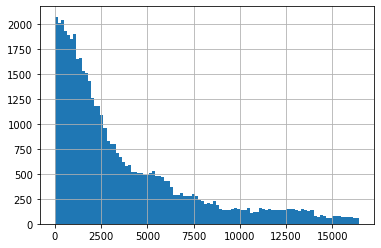

In [1264]:
# Проверим распределение признака Ranking.
data['Ranking'].hist(bins=100)

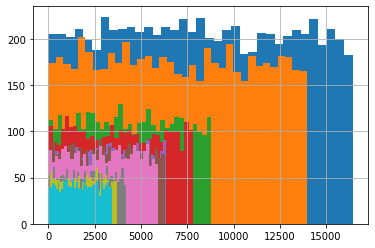

In [1265]:
# посмотрим на топ 10 городов
for x in (data['city'].value_counts())[0:10].index:
    data['Ranking'][data['city'] == x].hist(bins=35)


Мы видим, что признак имеет нормально растпределение, просто в крупных городах больше рестаранов. Разделим Ranking на количество ресторанов в городе.

In [1266]:
data['ranking_norm'] = data.Ranking / data.rest_counts

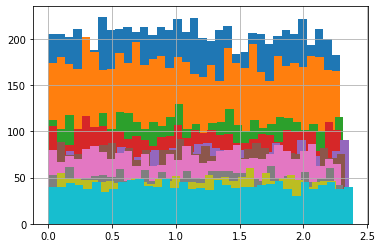

In [1267]:
for x in (data['city'].value_counts())[0:10].index:
    data['ranking_norm'][data['city'] == x].hist(bins=35)

#### Price Range
Заменим пропуски и изменим значения на числовые. Создадим признак отсутствия информации.


In [1268]:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    22456
NaN         16971
$            7612
$$$$         1722
Name: Price Range, dtype: int64

In [1269]:
#data['Price Range_NAN'] = data['Price Range'].isna().astype('uint8')
#data.head()
data['Price Range'] = data['Price Range'].str.replace('\$\$\$\$', '3')
data['Price Range'] = data['Price Range'].str.replace('\$\$\s-\s\$\$\$', '2')
data['Price Range'] = data['Price Range'].str.replace('\$', '1')
data['Price Range'] = data['Price Range'].fillna(0)
data.head()

,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran,chain_rest,City_url_ta,date_f,date_l,rewiew_days,days_to_today,last_rewiew_counts,len_rewiews,ranking_norm
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2007-11-14,2018-02-26,3757,1060,0.0,0.0,2.122299
1,id_5,Paris,"[French, Cafe, Fast Food]",5093.0,1,24.0,"[Lunch Break, Good to Quick Bite]",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2017-09-02,2017-09-07,5,1232,2.0,29.0,0.833824
2,id_15,Paris,[French],12899.0,1,39.0,"[Very nice food and staff, Lovely service and ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2016-11-12,2017-01-01,50,1481,2.0,49.0,2.111821
3,id_31,Paris,[Other],3156.0,0,19.0,[Very good food],/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2007-11-14,2017-09-24,3602,1215,1.0,14.0,0.516699
4,id_34,Paris,[French],476.0,2,136.0,"[Worthy of a trip out of the city centre!, Gre...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2017-04-30,2017-09-20,143,1219,2.0,52.0,0.077931


Мода цен в ресторанах.

In [1272]:
data['Price Range'].fillna(data['Price Range'].mode()[0], inplace=True)
data.head()

,Restaurant_id,city,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,rest_counts,ranked_cities,lat,lng,country,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran,chain_rest,City_url_ta,date_f,date_l,rewiew_days,days_to_today,last_rewiew_counts,len_rewiews,ranking_norm
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2007-11-14,2018-02-26,3757,1060,0.0,0.0,2.122299
1,id_5,Paris,"[French, Cafe, Fast Food]",5093.0,1,24.0,"[Lunch Break, Good to Quick Bite]",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2017-09-02,2017-09-07,5,1232,2.0,29.0,0.833824
2,id_15,Paris,[French],12899.0,1,39.0,"[Very nice food and staff, Lovely service and ...",/Restaurant_Review-g187147-d7605609-Reviews-Le...,d7605609,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2016-11-12,2017-01-01,50,1481,2.0,49.0,2.111821
3,id_31,Paris,[Other],3156.0,0,19.0,[Very good food],/Restaurant_Review-g187147-d11953078-Reviews-B...,d11953078,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2007-11-14,2017-09-24,3602,1215,1.0,14.0,0.516699
4,id_34,Paris,[French],476.0,2,136.0,"[Worthy of a trip out of the city centre!, Gre...",/Restaurant_Review-g187147-d9597870-Reviews-La...,d9597870,0,0.0,6108,37813.5,48.8566,2.3522,France,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,187147,2017-04-30,2017-09-20,143,1219,2.0,52.0,0.077931


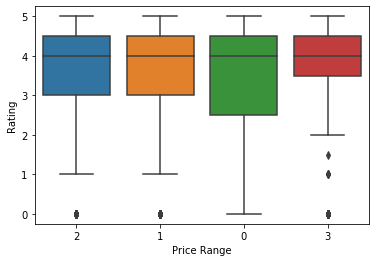

In [1276]:
sns.boxplot(x='Price Range', y='Rating', data=data);

Т.о. у дорогих ресторанов меньше низких оценок. Самый большой разброс цен в ресторанах с неопределенной ценовой политикой.

#### Number of Reviews

Рассмотрим пропуски в колонке.

In [1277]:
data[data['Number of Reviews'].isna()][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
36,NaN,0.0
37,NaN,1.0
59,NaN,0.0
60,NaN,0.0
92,NaN,0.0


In [1278]:
data['Number of Reviews'].isna().sum()

3124

In [1279]:
data.loc[(data['last_rewiew_counts'] == 0) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 0
data.loc[(data['last_rewiew_counts'] == 1) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 1

In [1280]:
data['Number of Reviews'].isna().sum()

0

In [1281]:
data[data['last_rewiew_counts'] ==0][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
0,4.0,0.0
9,12.0,0.0
14,9.0,0.0
15,3.0,0.0
16,4.0,0.0


Последние отзывы со значением 0 означает, что отзывы оставляли пустые.
Создадим словарь количество отзывов по городам и подставим в датасет

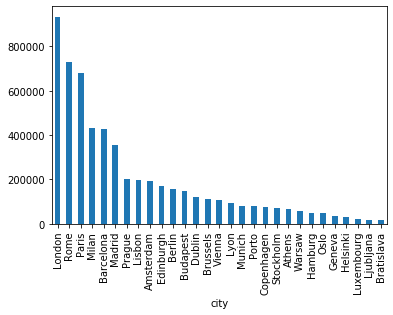

In [1282]:
data.groupby('city')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar');

In [1283]:
rewiews_city_dict = dict(data.groupby('city')['Number of Reviews'].sum())
data['num_rewiews_city'] = data.city.map(rewiews_city_dict)

Создадим признак отношения рейтинга в городе к количеству отзывов в городе.

In [1284]:
data['relative_rank_reviews'] = data['Ranking'] / data['num_rewiews_city']

### dummy

In [1285]:
data = pd.get_dummies(data, columns=['city'])

Удалим все нечисловые признаки и признаки, с которыми не будем работать.

In [1286]:
data = data.select_dtypes(exclude='O').drop(['date_f', 'date_l',
                                             'len_rewiews','Ranking',
                                             'last_rewiew_counts'], axis=1)
#data.drop(['URL_TA'], axis=1, inplace=True)

In [1287]:
data.head()

,Number of Reviews,sample,Rating,rest_counts,ranked_cities,lat,lng,capital,population,Cuisine Style_NAN,count_cuis,cuisine_r,Bar,Pub,French,Cafe,Fast Food,Other,Thai,European,Vegetarian Friendly,American,Steakhouse,African,Fusion,Barbecue,Pizza,Vietnamese,Street Food,Lebanese,Mediterranean,Italian,Turkish,Greek,Vegan Options,Halal,Indian,Japanese,Sushi,Asian,Arabic,British,Gastropub,Mexican,Latin,Peruvian,South American,International,Contemporary,Diner,Healthy,Argentinean,Colombian,Gluten Free Options,Delicatessen,Kosher,Taiwanese,Central American,Middle Eastern,Brew Pub,Moroccan,Israeli,Chinese,Wine Bar,Soups,Irish,Seafood,Persian,Indonesian,Cambodian,Afghani,Korean,Brazilian,Grill,Central European,Portuguese,Spanish,Canadian,Swiss,Sri Lankan,Caribbean,Malaysian,Australian,Ethiopian,Cajun & Creole,Cuban,Russian,Eastern European,Belgian,Filipino,Venezuelan,Swedish,Scandinavian,Danish,Norwegian,Pakistani,Singaporean,Tibetan,Tunisian,Egyptian,Hungarian,Polish,Mongolian,Ukrainian,Scottish,German,Southwestern,Armenian,Xinjiang,Native American,Chilean,Nepali,Central Asian,Hawaiian,Dutch,Georgian,Caucasian,Czech,Bangladeshi,Balti,Austrian,Welsh,Jamaican,New Zealand,Romanian,Ecuadorean,Burmese,Minority Chinese,Uzbek,Albanian,Slovenian,Latvian,Fujian,Croatian,Azerbaijani,Polynesian,Yunnan,Salvadoran,chain_rest,rewiew_days,days_to_today,ranking_norm,num_rewiews_city,relative_rank_reviews,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Bratislava,city_Brussels,city_Budapest,city_Copenhagen,city_Dublin,city_Edinburgh,city_Geneva,city_Hamburg,city_Helsinki,city_Lisbon,city_Ljubljana,city_London,city_Luxembourg,city_Lyon,city_Madrid,city_Milan,city_Munich,city_Oslo,city_Paris,city_Porto,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw
0,4.0,0,0.0,6108,37813.5,48.8566,2.3522,1,11.02,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3757,1060,2.122299,680895.0,0.019038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,24.0,0,0.0,6108,37813.5,48.8566,2.3522,1,11.02,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,5,1232,0.833824,680895.0,0.007480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,39.0,0,0.0,6108,37813.5,48.8566,2.3522,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,50,1481,2.111821,680895.0,0.018944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,19.0,0,0.0,6108,37813.5,48.8566,2.3522,1,11.02,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,3602,1215,0.516699,680895.0,0.004635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,136.0,0,0.0,6108,37813.5,48.8566,2.3522,1,11.02,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,143,1219,0.077931,680895.0,0.000699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Посмотрим распределение целевой переменной

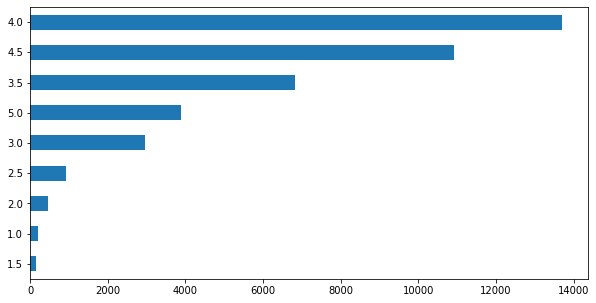

In [1288]:
plt.figure(figsize=(10, 5))
df_train['Rating'].value_counts(ascending=True).plot(kind='barh');

Посмотрим распределение целевой переменной относительно признака ranking_norm

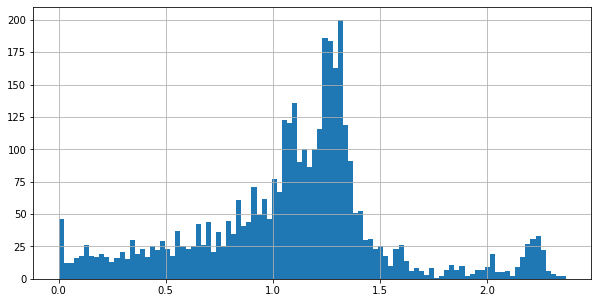

In [1289]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] == 5].hist(bins=100);

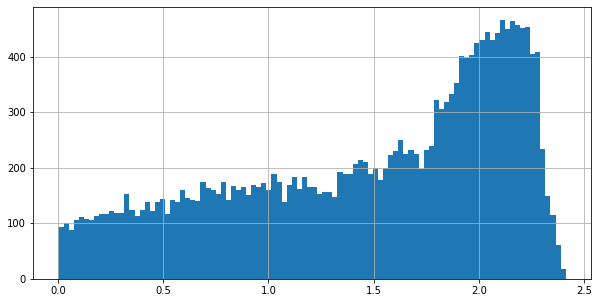

In [1290]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] < 4].hist(bins=100);

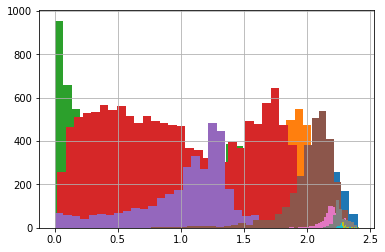

In [1291]:
for x in data.Rating.unique():
    data['ranking_norm'][data['Rating'] == x].hist(bins=35)

### Корреляция признаков
На этом графике видно, как признаки связаны между собой и с целевой переменной


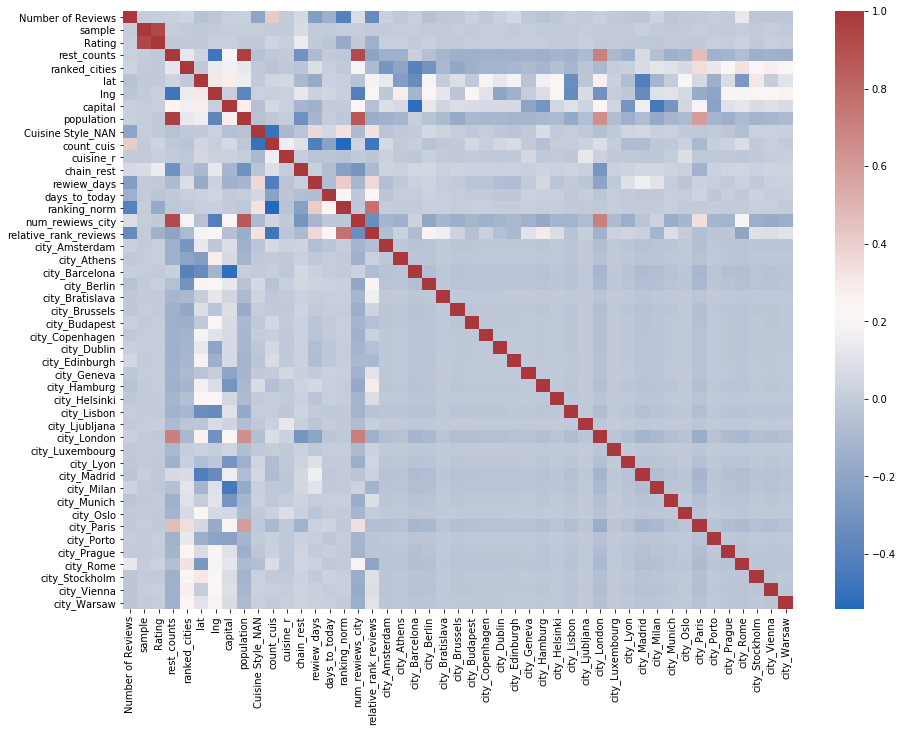

In [1292]:
plt.rcParams['figure.figsize'] = (15,11)
sns.heatmap(data.drop(cuisine_lst, axis=1).corr(), cmap='vlag');

Корреляция с целевой переменной

In [1293]:
data.drop(cuisine_lst, axis=1).corr().Rating.sort_values(ascending=False).to_frame()

,Rating
Rating,1.000000
sample,0.936164
chain_rest,0.146892
count_cuis,0.033860
city_Rome,0.028060
city_Athens,0.017158
lng,0.015822
city_Berlin,0.013167
capital,0.012409
Number of Reviews,0.011316


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [1294]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

In [1295]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [1296]:
y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [1297]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [1298]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [1299]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [1300]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2015740645822655
